In [21]:
# Loading the required initial liberary:

import pandas as pd
import numpy as np


In [22]:
# Loading the dataset 

df = pd.read_csv(r'D:\Data Science\Feature engg\feature-engineering-technique\dataset\ds_salaries.csv')

In [23]:
# checking the top 5 records

df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [24]:
# checking the botton 5 records

df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [25]:
# let's also check the shape 

df.shape

(607, 12)

## Lets collect some domine information 

1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
3. employment_type:	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency:	The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd:	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
10. company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
11. company_size: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)


### Basic step preformed on any data set 

* Checking the type of data usning info --> df.info()
* checking the statistical concept what data is saying --> df.describe()
* checking the null value and replacing it as needed --> df.isnull.sum()

In [26]:
# Information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


From the above I can clearly see that there is no null value present inside my data and also there are few columns 
namely --> 'experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'

In [27]:
# only getting the object dtype
object_df = df.select_dtypes(include='object')

In [28]:
object_df

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,EUR,DE,DE,L
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S
2,SE,FT,Big Data Engineer,GBP,GB,GB,M
3,MI,FT,Product Data Analyst,USD,HN,HN,S
4,SE,FT,Machine Learning Engineer,USD,US,US,L
...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,USD,US,US,M
603,SE,FT,Data Engineer,USD,US,US,M
604,SE,FT,Data Analyst,USD,US,US,M
605,SE,FT,Data Analyst,USD,US,US,M


In [29]:
int_df = df.select_dtypes(include='int')

In [30]:
int_df

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
0,0,2020,70000,79833,0
1,1,2020,260000,260000,0
2,2,2020,85000,109024,50
3,3,2020,20000,20000,0
4,4,2020,150000,150000,50
...,...,...,...,...,...
602,602,2022,154000,154000,100
603,603,2022,126000,126000,100
604,604,2022,129000,129000,0
605,605,2022,150000,150000,100


Lets remove unnamed column from the original data 


In [31]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [32]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [35]:
int_df

,work_year,salary,salary_in_usd,remote_ratio
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50
...,...,...,...,...
602,2022,154000,154000,100
603,2022,126000,126000,100
604,2022,129000,129000,0
605,2022,150000,150000,100


In [36]:
# Lets check the describe method

int_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


Let's also try to import seaborn and try to visualize the information

In [40]:
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns

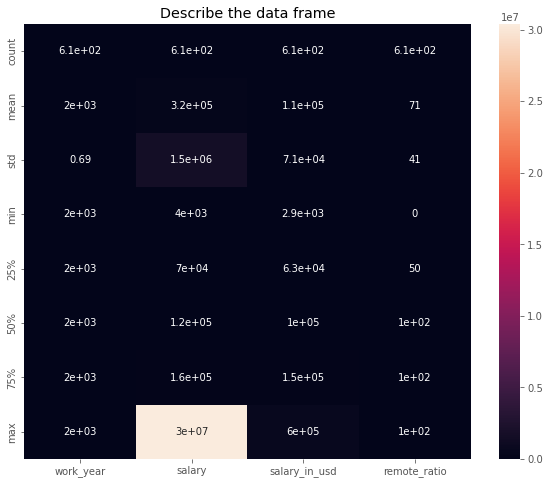

In [41]:
style.use('ggplot')
plt.figure(figsize=(10,8))
sns.heatmap(int_df.describe(), annot=True)
plt.title('Describe the data frame')
plt.show()


What is heatmap analysis?

Heat map analysis is the process of reviewing and analyzing heat map data to gather insights about user interaction and behavior as they engage with your product. This data analysis can lead to improved site designs with lower bounce rates, reduced churn, fewer drop-offs, more pageviews, and better conversion rates.

From the above we can see the statistical information from the data. 

In [44]:
int_df

,work_year,salary,salary_in_usd,remote_ratio
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50
...,...,...,...,...
602,2022,154000,154000,100
603,2022,126000,126000,100
604,2022,129000,129000,0
605,2022,150000,150000,100


In [45]:
object_df

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,EUR,DE,DE,L
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S
2,SE,FT,Big Data Engineer,GBP,GB,GB,M
3,MI,FT,Product Data Analyst,USD,HN,HN,S
4,SE,FT,Machine Learning Engineer,USD,US,US,L
...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,USD,US,US,M
603,SE,FT,Data Engineer,USD,US,US,M
604,SE,FT,Data Analyst,USD,US,US,M
605,SE,FT,Data Analyst,USD,US,US,M


In [46]:
object_df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [55]:
int_df['salary'].max()

30400000

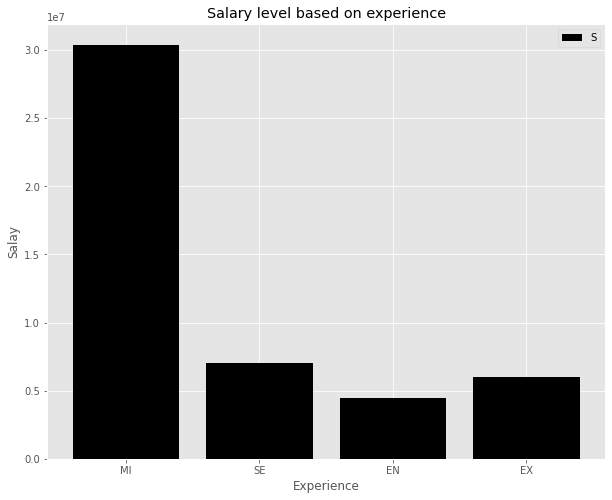

In [60]:

plt.figure(figsize=(10,8))
plt.bar(object_df['experience_level'], int_df['salary'],color='k')
plt.title('Salary level based on experience')
plt.xlabel('Experience')
plt.ylabel('Salay')
plt.legend('Salary',loc=0)
plt.show()

From the above we can see that MI Mid-level employee earn 30Million salary every year than compare to others.

In [122]:
import plotly as py                
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot   
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px

In [102]:
fig = px.scatter(df, x='experience_level', y='salary', color="employment_type",size='work_year')
fig.update_traces(textposition="bottom right")
fig.show()

From the above we can see that data scienctis is earning the most as compare to all other analytic jobs then followed by BI Data Analyst and soon..

In [110]:
fig = px.pie(df, values='salary_in_usd', names='experience_level', title='Salary in USD')
fig.show()

From the above we can see that how much people earn in USD
SE : Senoir level earns more salary in USD i.e. 56.9% and his title is Machine learning scientis, then followeb by Data scientist.

####  Earning in india

In [117]:
fig = px.pie(df.query("employment_type== 'FT' ").query("work_year == 2020"), 
             values='salary', names='experience_level', title='Salary in INDIA')
fig.show()

In India we can see that Mid Level Experience earn more as compare to other

### Q: counts of jobs 

In [123]:
df['job_title'].value_counts().iplot(kind='bar')

From the observation we can see tha the count of jobs.

In [129]:
df['employment_type'].value_counts().iplot(kind='bar')

From the above we can see that Full Time employee are hire most of the time

### Q: looking at the salary currency based on employee residence

In [142]:
px.scatter(df[:50], y='salary_currency', x='employee_residence',color='experience_level')

From the above I have taken top 20 records and observed that based on the redidence addresss the currency is divided.

In [153]:
fig = px.pie(df, 
             values='remote_ratio', names='company_size', title='Size of company in INDIA')
fig.show()

From the above we can see that Medium size company provide more work from home as compared to large scale company.

### Q: who will give more salary

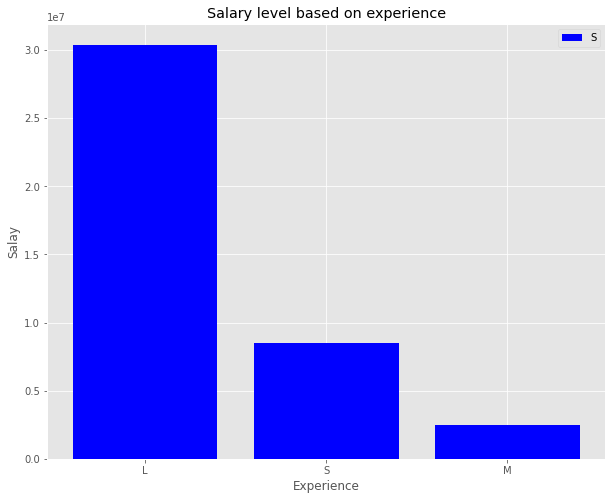

In [156]:

plt.figure(figsize=(10,8))
plt.bar(df['company_size'],df['salary'],color='b')
plt.title('Salary level based on experience')
plt.xlabel('Experience')
plt.ylabel('Salay')
plt.legend('Salary',loc=0)
plt.show()

From the above we can see that Large scale company give more salary as compare to others.

In [158]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
